In [2]:

#building stats model

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('E:\\Database\\database.sqlite')
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

#model = smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", data= df).fit()
    
#model.summary()

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [ ]:
#treating missing values
df.fillna(df.mean(), inplace= True)
df.isnull().sum()

In [7]:
#one hot encoding
df['preferred_foot'], _ = pd.factorize(df['preferred_foot'])
df['attacking_work_rate'], _ = pd.factorize(df['attacking_work_rate'])
df['defensive_work_rate'], _ = pd.factorize(df['defensive_work_rate'])

In [12]:
model = smf.ols("overall_rating ~ potential+preferred_foot + attacking_work_rate +defensive_work_rate + crossing + finishing +heading_accuracy+short_passing +volleys +dribbling +curve+ free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties +marking +standing_tackle +sliding_tackle+gk_diving +gk_handling+gk_kicking+gk_positioning+gk_reflexes", data= df).fit()
    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.647e+04
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        22:48:34   Log-Likelihood:            -4.5005e+05
No. Observations:              183978   AIC:                         9.002e+05
Df Residuals:                  183940   BIC:                         9.006e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.5767      0.094    -38.227      0.000      -3.760      -3.393
potential               0.3790      0.001    261.349      0.000       0.376       0.382
preferred_foot         -0.0168      0.015     -1.088      0.277      -0.047       0.013
attacking_work_rate     0.2254      0.010     22.430      0.000       0.206       0.245
defensive_work_rate    -0.0071      0.005     -1.519      0.129      -0.016       0.002
crossing                0.0215      0.001     25.716      0.000       0.020       0.023
finishing               0.0114      0.001     12.478      0.000       0.010       0.013
heading_accuracy        0.0693      0.001     85.462      0.000       0.068       0.071
short_passing           0.0512      0.001     37.631      0.000       0.049       0.054
volleys                 0.0035      0.001      4.248      0.000       0.002       0.005
dribbling              -0.0116      0.001    -10.101      0.000      -0.014      -0.009
curve                   0.0110      0.001     13.824      0.000       0.009       0.013
free_kick_accuracy      0.0136      0.001     19.267      0.000       0.012       0.015
long_passing            0.0073      0.001      7.829      0.000       0.005       0.009
ball_control            0.1354      0.002     86.370      0.000       0.132       0.139
acceleration            0.0057      0.001      4.143      0.000       0.003       0.008
sprint_speed            0.0094      0.001      7.218      0.000       0.007       0.012
agility                -0.0089      0.001     -8.812      0.000      -0.011      -0.007
reactions               0.2082      0.001    193.877      0.000       0.206       0.210
balance                 0.0073      0.001      9.312      0.000       0.006       0.009
shot_power              0.0164      0.001     18.785      0.000       0.015       0.018
jumping                 0.0163      0.001     22.353      0.000       0.015       0.018
stamina                -0.0054      0.001     -6.616      0.000      -0.007      -0.004
strength                0.0613      0.001     73.505      0.000       0.060       0.063
long_shots             -0.0127      0.001    -13.995      0.000      -0.014      -0.011
aggression              0.0195      0.001     28.517      0.000       0.018       0.021
interceptions           0.0125      0.001     17.199      0.000       0.011       0.014
positioning            -0.0099      0.001    -12.678      0.000      -0.011      -0.008
vision                 -0.0027      0.001     -3.122      0.002      -0.004      -0.001
penalties               0.0138      0.001     18.590      0.000       0.012       0.015
marking                 0.0326      0.001     29.419      0.000       0.030       0.035
standing_tackle         0.0037      0.001      2.926      0.003       0.001       0.006
sli

In [13]:
df.corr  #Multicollinearity

<bound method DataFrame.corr of             id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
5            6              189615         155782  2016-04-21 00:00:00   
6            7              189615         155782  2016-04-07 00:00:00   
7            8              189615         155782  2016-01-07 00:00:00   
8            9              189615         155782  2015-12-24 00:00:00   
9           10              189615         155782  2015-12-17 00:00:00   
10          11              189615         155782  2015-10-16 00:00:00   
11          12              189615         155782  2015-09-25 00:00:00   
12    

<function matplotlib.pyplot.show(*args, **kw)>

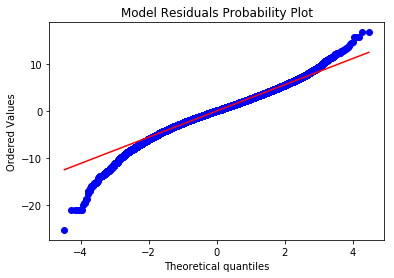

In [16]:
#diagonising normality
import matplotlib.pyplot as plt
stats.probplot(model.resid, plot= plt)
plt.title("Model Residuals Probability Plot")
plt.show

In [20]:
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.21449381830922298, pvalue=0.0)

In [21]:
#Diagnosing Homoscedasticity
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 18361.878618374554),
 ('p-value', 0.0),
 ('f-value', 551.1743018812984),
 ('f p-value', 0.0)]

In [24]:
model.rsquared       #accuracy

0.8418796238026331

In [ ]:
#After dropping categorical columns

In [17]:
# droping categorical columns
del_list = ["id", "player_fifa_api_id", "player_api_id" ,"date","preferred_foot","attacking_work_rate","defensive_work_rate"]
df = df.drop(del_list , axis = 1)
model2 = smf.ols("overall_rating ~ potential+ crossing + finishing +heading_accuracy+short_passing +volleys +dribbling +curve+ free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties +marking +standing_tackle +sliding_tackle+gk_diving +gk_handling+gk_kicking+gk_positioning+gk_reflexes", data= df).fit()
    

    
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.869e+04
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        22:54:47   Log-Likelihood:            -4.5036e+05
No. Observations:              183978   AIC:                         9.008e+05
Df Residuals:                  183943   BIC:                         9.011e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.6375      0.094    -38.898      0.000      -3.821      -3.454
potential              0.3795      0.001    261.452      0.000       0.377       0.382
crossing               0.0218      0.001     26.254      0.000       0.020       0.023
finishing              0.0116      0.001     12.718      0.000       0.010       0.013
heading_accuracy       0.0697      0.001     85.782      0.000       0.068       0.071
short_passing          0.0506      0.001     37.124      0.000       0.048       0.053
volleys                0.0034      0.001      4.199      0.000       0.002       0.005
dribbling             -0.0121      0.001    -10.443      0.000      -0.014      -0.010
curve                  0.0109      0.001     13.718      0.000       0.009       0.012
free_kick_accuracy     0.0135      0.001     19.231      0.000       0.012       0.015
long_passing           0.0068      0.001      7.283      0.000       0.005       0.009
ball_control           0.1353      0.002     86.114      0.000       0.132       0.138
acceleration           0.0060      0.001      4.384      0.000       0.003       0.009
sprint_speed           0.0097      0.001      7.446      0.000       0.007       0.012
agility               -0.0089      0.001     -8.801      0.000      -0.011      -0.007
reactions              0.2086      0.001    194.037      0.000       0.207       0.211
balance                0.0075      0.001      9.614      0.000       0.006       0.009
shot_power             0.0164      0.001     18.808      0.000       0.015       0.018
jumping                0.0161      0.001     22.113      0.000       0.015       0.018
stamina               -0.0048      0.001     -5.925      0.000      -0.006      -0.003
strength               0.0614      0.001     73.440      0.000       0.060       0.063
long_shots            -0.0126      0.001    -13.890      0.000      -0.014      -0.011
aggression             0.0199      0.001     29.126      0.000       0.019       0.021
interceptions          0.0126      0.001     17.326      0.000       0.011       0.014
positioning           -0.0097      0.001    -12.355      0.000      -0.011      -0.008
vision                -0.0027      0.001     -3.142      0.002      -0.004      -0.001
penalties              0.0138      0.001     18.568      0.000       0.012       0.015
marking                0.0329      0.001     29.654      0.000       0.031       0.035
standing_tackle        0.0036      0.001      2.831      0.005       0.001       0.006
sliding_tackle        -0.0292      0.001    -27.871      0.000      -0.031      -0.027
gk_diving              0.1662      0.001    114.700      0.000       0.163       0.169
gk_handling            0.0321      0.002     16.702      0.000       0.028       0.036
gk_kicking            -0.0329      0.0

<function matplotlib.pyplot.show(*args, **kw)>

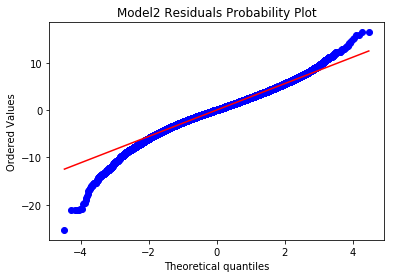

In [18]:
#diagonising normality
stats.probplot(model2.resid, plot= plt)
plt.title("Model2 Residuals Probability Plot")
plt.show

In [19]:
stats.kstest(model2.resid, 'norm')

KstestResult(statistic=0.21473226649144816, pvalue=0.0)

In [23]:
#Diagnosing Homoscedasticity
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 18478.379041555057),
 ('p-value', 0.0),
 ('f-value', 604.0476738319761),
 ('f p-value', 0.0)]

In [25]:
model2.rsquared    #accuracy

0.8413480516699352